# Train a pose to sign language video generator
This notebook trains a pix2pix GAN whose input is pose images and output is a human making those poses. These images can be combined into a video. The training data was created from an ASLLVD database [video clip](http://csr.bu.edu/ftp/asl/asllvd/asl-data2/quicktime/ASL_2007_05_24/scene3-camera1.mov). This code can be readily run in google colab.

In [0]:
!apt-get update && apt-get install -y imagemagick

In [0]:
!git clone https://github.com/affinelayer/pix2pix-tensorflow.git
!cd pix2pix-tensorflow

## Get the training data

In [3]:
from getpass import getpass
import boto3
access_id = getpass('access id: ')
secret = getpass('secret id: ')

access id: ··········
secret id: ··········


In [0]:
s3r = boto3.resource('s3', aws_access_key_id=access_id,
    aws_secret_access_key=secret)
bucket = s3r.Bucket('insight-ai-project-en-asl')
bucket.download_file('pose2sign/data/train-images.tar.gz', 'train-images.tar.gz', )
!tar -zxvf train-images.tar.gz images/

## Train pix2pix for 50 epochs

In [8]:
!cd pix2pix-tensorflow && python pix2pix.py \
  --mode train \
  --output_dir ../pose2vid_train/ \
  --max_epochs 50 \
  --input_dir ../images/combined/train/ \
  --which_direction AtoB



aspect_ratio = 1.0
batch_size = 1
beta1 = 0.5
checkpoint = None
display_freq = 0
flip = True
gan_weight = 1.0
input_dir = ../images/combined/train/
l1_weight = 100.0
lab_colorization = False
lr = 0.0002
max_epochs = 50
max_steps = None
mode = train
ndf = 64
ngf = 64
output_dir = ../pose2vid_train/
output_filetype = png
progress_freq = 50
save_freq = 5000
scale_size = 286
seed = 999640858
separable_conv = False
summary_freq = 100
trace_freq = 0
which_direction = AtoB
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(string_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensor_slices(input_tensor).shuffle(tf.shape(input_tensor, out_type=tf.int64)[0]).repeat(num_epochs)`. If `shuffle=False`, omit the `.shuffle(...)`.
I

## Test Output Results

In [0]:
# test the model
!cd pix2pix-tensorflow && python pix2pix.py \
  --mode test \
  --output_dir ../pose2vid_test/ \
  --input_dir ../images/combined/val/ \
  --checkpoint ../pose2vid_train/

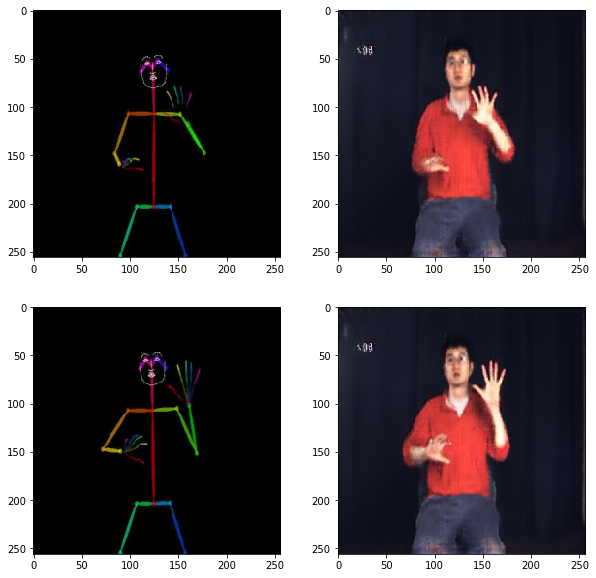

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

input_image1 = mpimg.imread('pose2vid_test/images/train-video-00117-inputs.png')
output_image1 = mpimg.imread('pose2vid_test/images/train-video-00117-outputs.png')
input_image2 = mpimg.imread('pose2vid_test/images/train-video-00201-inputs.png')
output_image2 = mpimg.imread('pose2vid_test/images/train-video-00201-outputs.png')

f, axarr = plt.subplots(2, 2, figsize=(10, 10))
axarr[0,0].imshow(input_image1)
axarr[0,1].imshow(output_image1)
axarr[1,0].imshow(input_image2)
axarr[1,1].imshow(output_image2)